In [39]:
import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [40]:
df=pd.read_csv('/content/train.csv')

In [41]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

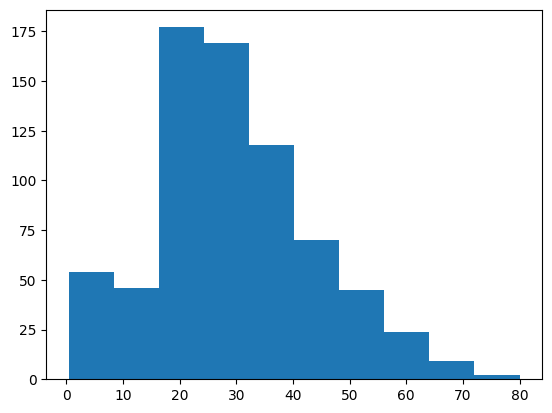

In [45]:
plt.hist(df['Age'])

There are maximum people who are of the range (20-30)

In [46]:
mean_age=np.mean(df['Age'])

In [47]:
df['Age'].fillna(mean_age,inplace=True)

In [48]:
df['Cabin'].isnull().sum()

687

In [49]:
del df['Cabin']

In [50]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [51]:
mode_embarked=sts.mode(df['Embarked'])
mode_embarked

'S'

In [52]:
df['Embarked'].fillna(mode_embarked,inplace=True)

(array([646.,   0.,   0.,   0.,   0., 168.,   0.,   0.,   0.,  77.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

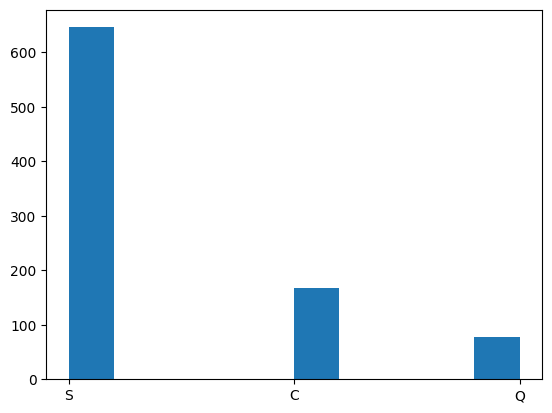

In [53]:
plt.hist(df['Embarked'])

The feature "Embarked" has a large number of examples that are in the range of S (0-600+),C (0-200),Q (0-100)

In [54]:
df['Embarked'].isnull().sum()

0

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [56]:
df.drop(columns=['PassengerId', 'Ticket','SibSp','Parch','Name'], inplace=True)

In [57]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.000000,7.2500,S
1,1,1,female,38.000000,71.2833,C
2,1,3,female,26.000000,7.9250,S
3,1,1,female,35.000000,53.1000,S
4,0,3,male,35.000000,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S
887,1,1,female,19.000000,30.0000,S
888,0,3,female,29.699118,23.4500,S
889,1,1,male,26.000000,30.0000,C


<BarContainer object of 2 artists>

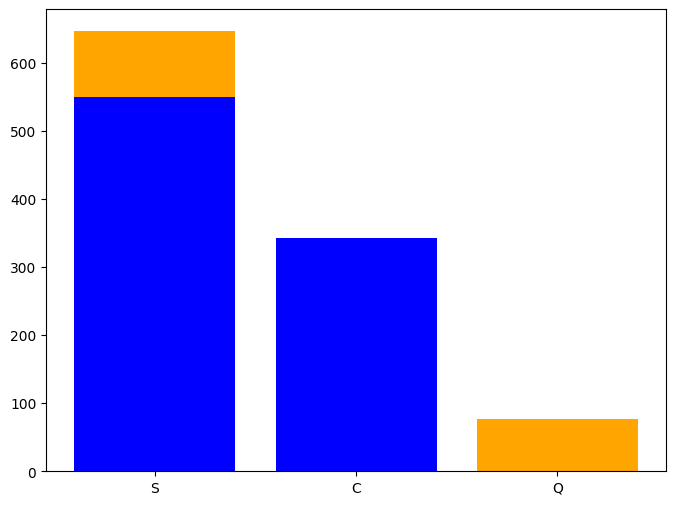

In [58]:
survived_counts = df['Survived'].value_counts()
embarked_counts = df['Embarked'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(embarked_counts.index, embarked_counts.values, color='orange', label='Embarked')
ax.bar(survived_counts.index, survived_counts.values, color='blue', label='Survived')

The Feature "Embarked" has a great effect on the Output "Survived"

<BarContainer object of 2 artists>

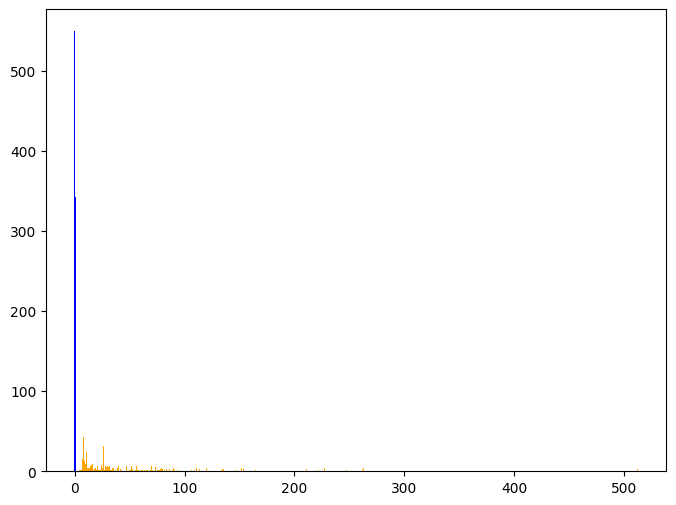

In [59]:
fare_counts = df['Fare'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(fare_counts.index, fare_counts.values, color='orange')
ax.bar(survived_counts.index, survived_counts.values, color='blue')

The Feature "Fare" **has a very less effect** on the output feature "Survived" so we will drop it.



In [60]:
df.drop(columns=['Fare'],inplace=True)

<BarContainer object of 2 artists>

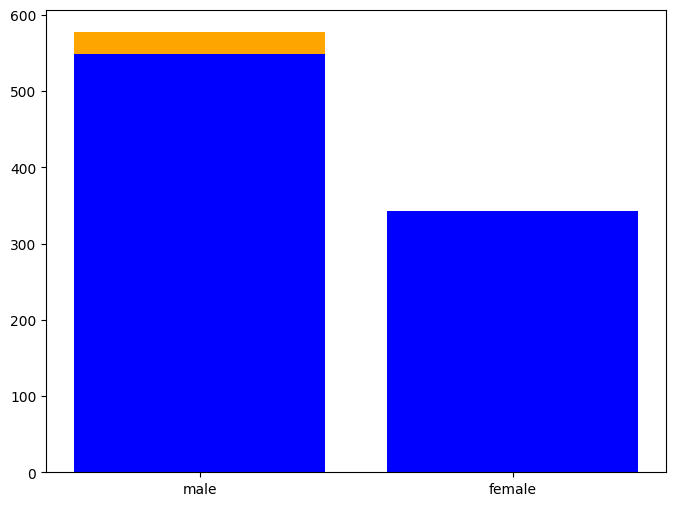

In [61]:
gender_count=df['Sex'].value_counts()
fig,ax=plt.subplots(figsize=(8,6))

ax.bar(gender_count.index,gender_count.values,color='orange')
ax.bar(survived_counts.index,survived_counts.values,color='Blue')

The feature "Sex" has a great impact on the output feature "Survived"

In [62]:
df['Sex_new'] = df['Sex'].map({'male': 1, 'female': 0})
df['Embarked_new']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [63]:
df

,Survived,Pclass,Sex,Age,Embarked,Sex_new,Embarked_new
0,0,3,male,22.000000,S,1,0
1,1,1,female,38.000000,C,0,1
2,1,3,female,26.000000,S,0,0
3,1,1,female,35.000000,S,0,0
4,0,3,male,35.000000,S,1,0
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,S,1,0
887,1,1,female,19.000000,S,0,0
888,0,3,female,29.699118,S,0,0
889,1,1,male,26.000000,C,1,1


<BarContainer object of 2 artists>

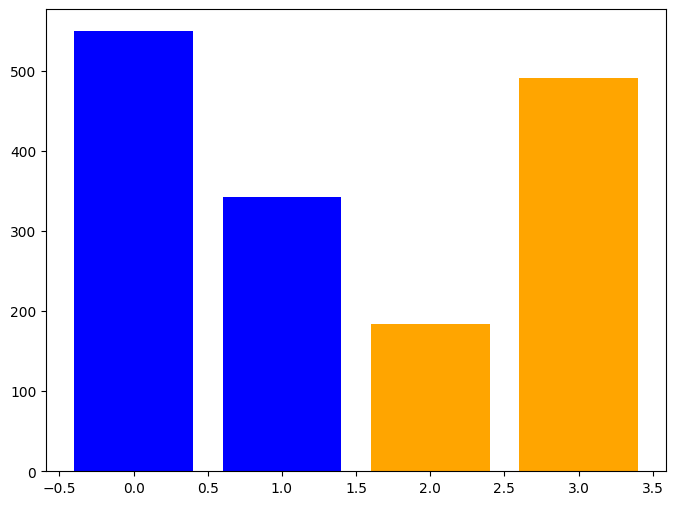

In [64]:
pclass_count=df['Pclass'].value_counts()
fig,ax=plt.subplots(figsize=(8,6))

ax.bar(pclass_count.index,pclass_count.values,color='orange')
ax.bar(survived_counts.index,survived_counts.values,color='Blue')

The feature "Pclass" has a great impact on the output feature "Survived"

In [65]:
df.describe()

,Survived,Pclass,Age,Sex_new,Embarked_new
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.647587,0.361392
std,0.486592,0.836071,13.002015,0.477990,0.635673
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,1.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,1.000000,2.000000


In [66]:
x=df[['Age','Embarked_new','Sex_new','Pclass']]
y=df['Survived']

In [67]:
standard_scaler=StandardScaler()
x_standard_scaled=standard_scaler.fit_transform(x)

In [68]:
x_train_standard_scaled,x_test_standard_scaled,y_train,y_test=train_test_split(x,y,test_size=1/2,random_state=0)

In [69]:
model=LogisticRegression()
model.fit(x_train_standard_scaled,y_train)

LogisticRegression()

In [70]:
y_pred_standard_scaled=model.predict(x_test_standard_scaled)
y_pred_standard_scaled

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

In [71]:
accuracy_score(y_pred_standard_scaled,y_test)

0.7780269058295964

In [72]:
recall=recall_score(y_pred_standard_scaled,y_test)
recall

0.6904761904761905

In [73]:
new_data={'Age': [10],
    'Embarked_new': [3],
    'Sex_new': [1],
    'Pclass': [3]}


new_df=pd.DataFrame(new_data)
new_data

{'Age': [10], 'Embarked_new': [3], 'Sex_new': [1], 'Pclass': [3]}

In [74]:
pred=model.predict(new_df)
print(pred)
prob = model.predict_proba(new_df)[:,1]
print(prob)


[0]
[0.40965501]


In [75]:
if prob>0.5:
  print('Survived')
else:
  print('Did not Survive')

Did not Survive
